# EDA

## IMPORTAR PAQUETES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [ ]:
ruta_proyecto = 'C:/Users/User/Desktop/DS4B/03_MACHINE_LEARNING/08_CASOS/01_leadScoring'

Nombres de los ficheros de datos.

In [4]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [5]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [6]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [7]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
25,ambito,Healthcare Management,0.020578
28,ambito,International Business,0.021333
35,ambito,Travel and Tourism,0.026430
30,ambito,Media and Advertising,0.027563
22,ambito,"Banking, Investment And Insurance",0.043421
34,ambito,Supply Chain Management,0.045686
27,ambito,IT Projects Management,0.049462
23,ambito,Business Administration,0.052671
32,ambito,Operations Management,0.062488
31,ambito,OTROS,0.065509


In [13]:
cat = cat.loc[
    (cat.no_llamar != 'OTROS') & 
    (cat.no_enviar_email != 'Yes') & 
    (cat.ult_actividad != 'Email Bounced')
    ].drop(columns = ['conociste_facebook', 
                 'conociste_google', 
                 'conociste_periodico', 
                 'conociste_referencias', 
                 'no_llamar', 
                 'no_enviar_email'])

In [16]:
num = num[num.index.isin(cat.index)]

### Análisis gráfico

In [19]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

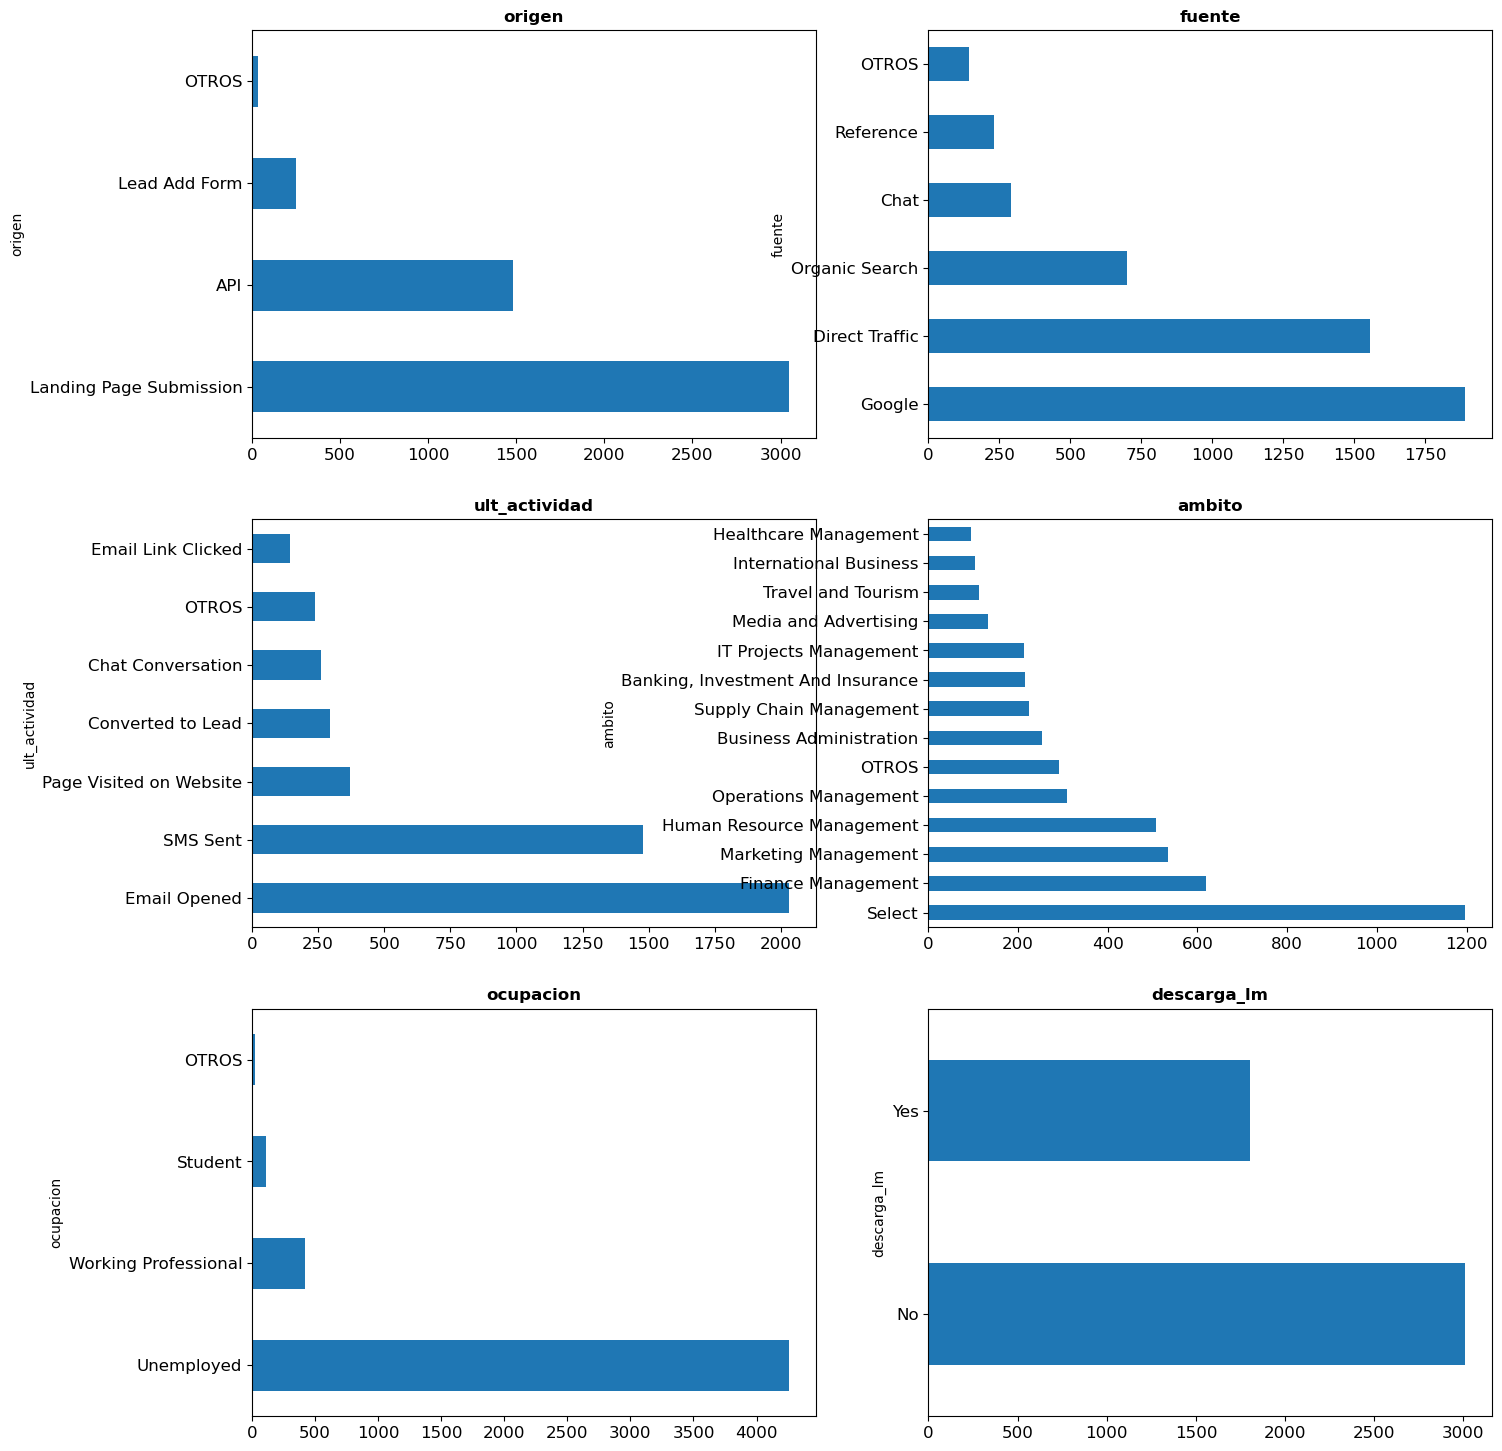

In [20]:
graficos_eda_categoricos(cat)

## EDA NUMÉRICAS

### Análisis estadístico

In [21]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [22]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
compra,4812.0,0.417498,0.0,0.493198,0.0,0.0,0.0,1.0,1.0
visitas_total,4812.0,4.164796,3.0,3.50426,0.0,2.0,3.0,5.0,50.0
tiempo_en_site_total,4812.0,609.21862,371.0,558.782328,0.0,131.0,371.0,1102.0,2272.0
paginas_vistas_visita,4812.0,2.876993,2.5,1.905828,0.0,2.0,2.5,4.0,15.0
score_actividad,4812.0,14.055071,14.0,0.958981,7.0,14.0,14.0,14.0,18.0
score_perfil,4812.0,16.307149,16.0,1.438552,11.0,16.0,16.0,17.0,20.0


### Análisis gráfico

In [23]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

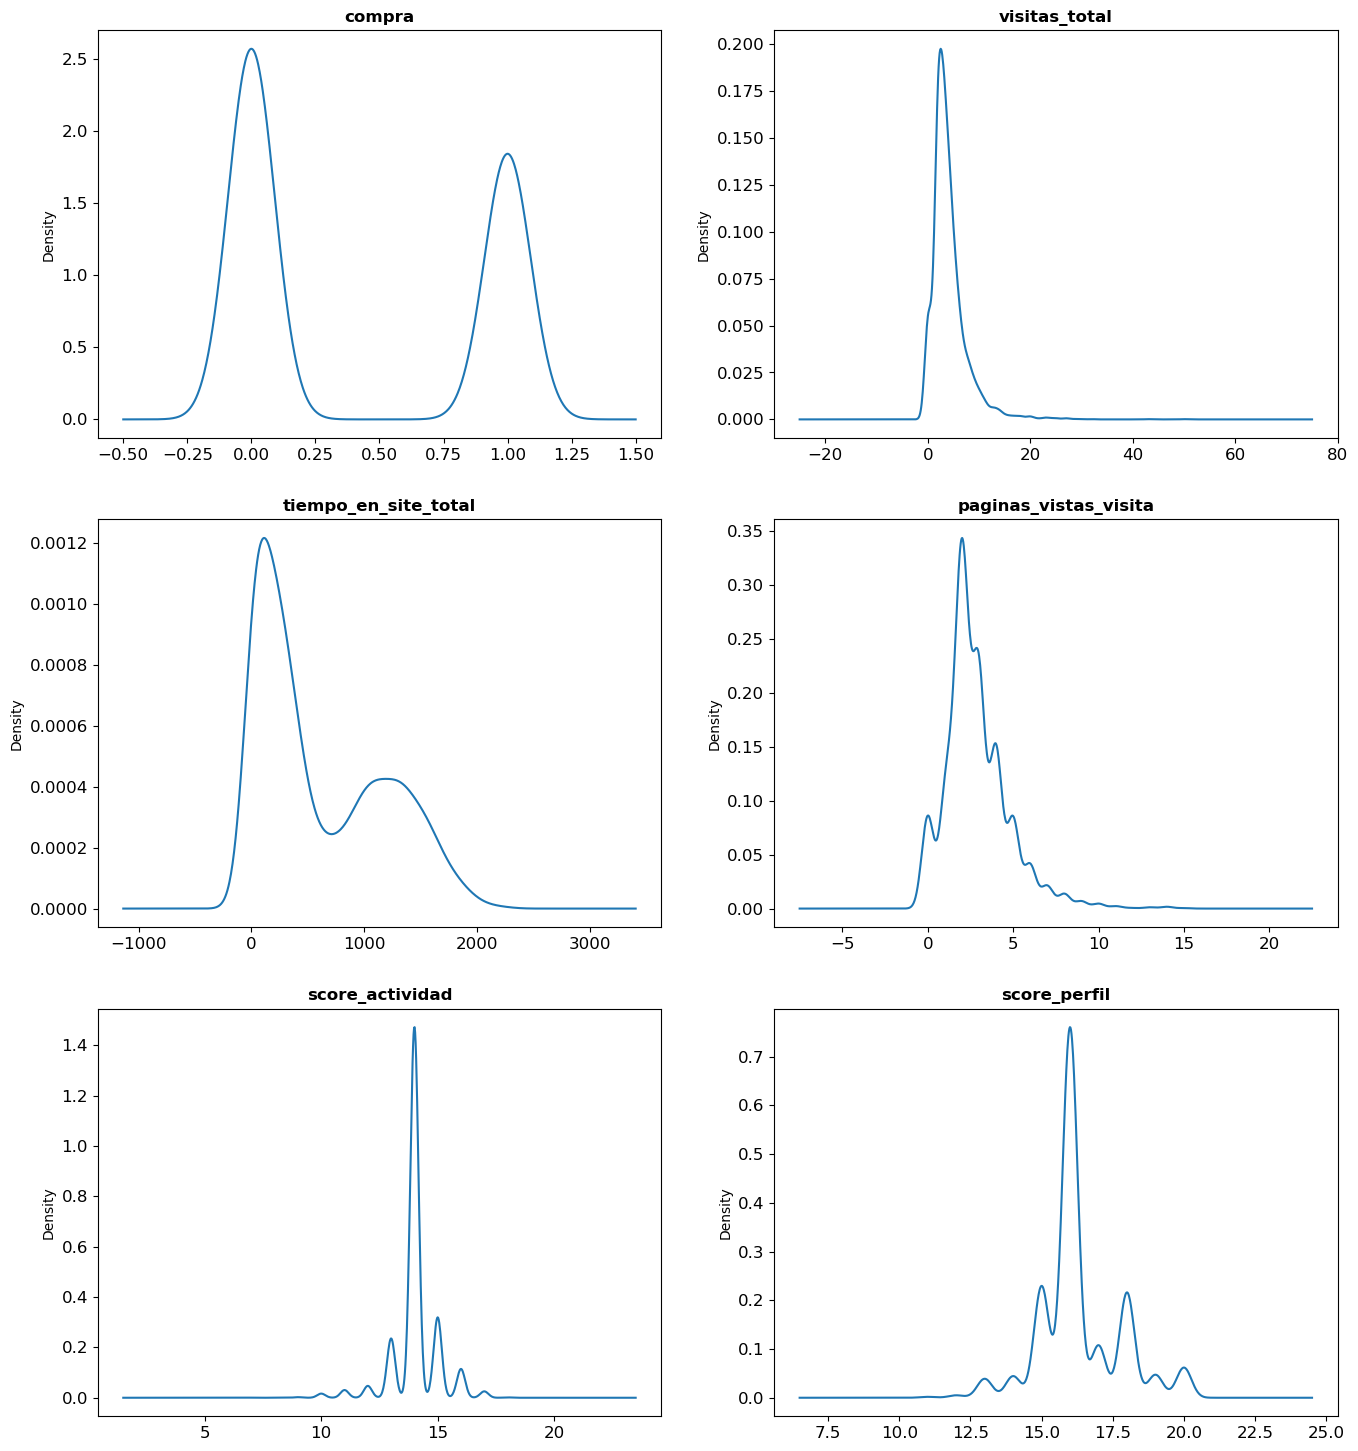

In [24]:
graficos_eda_continuas(num)

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [25]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [26]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)